In [1]:
#import the required libraries
import pandas as pd
import string
from nltk.corpus import stopwords

In [2]:
#read the spam data collection using pandas
spamCollection = pd.read_csv('C:\\Users\\Vaibhav\\Desktop\\BA\\Datasets\\MessageSpamCollection_dataset\\SpamCollection\\SpamCollection', 
                sep='\t', header=None, names=['response', 'message'])
#header is none, and putting the names of the columns response and message

In [3]:
#explore data
spamCollection.shape

(5572, 2)

In [4]:
spamCollection[:10].describe

<bound method NDFrame.describe of   response                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...>

In [5]:
spamCollection.head()

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#view using groupby
spamCollection.groupby('response').describe()


message                                                            \
           count unique                                                top   
response                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
response       
ham        30  
spam        4

In [7]:
#find the number of characters in each message
spamCollection['length'] = spamCollection['message'].apply(len)
spamCollection.head(3)

,response,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [8]:
spamCollection.drop("length",1, inplace=True)

In [9]:
spamCollection.iloc[1,1]

'Ok lar... Joking wif u oni...'

In [10]:
spamCollection.columns

Index(['response', 'message'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X = spamCollection.drop("response", 1)
y = spamCollection.response
# split X and y into training ans testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 1)
(1393, 1)
(4179,)
(1393,)


----

### DEMONSTRATION: HOW TO CLEAN UP 1 MESSAGE
Clean up each row in msg col
- remove the punctuations by comparing with string.punctuations
- join the characters to create words
- remove the stop words

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
X_train["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
no_punctuation = [char for char in X_train["message"][0] if char not in string.punctuation]
no_punctuation

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [16]:
no_punctuation_msg = ''.join(no_punctuation) #joins all the strings
no_punctuation_msg

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [17]:
#Make the message in lower case, since all the stopwords in the wordnet lexicon (in nltk library) are present in lowercase
#Remove the stop-words from the message

In [18]:
stopwords_json = pd.read_json("https://raw.githubusercontent.com/6/stopwords-json/master/dist/en.json" )
stopwords_json.head(3)
stopwords_json.columns = ["en"]
x = stopwords.words("english")

In [19]:
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(x)
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

In [20]:
x = [word for word in no_punctuation_msg.split() if word.lower() not in stopwords.words('english')]
x

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

---

In [21]:
#Lets get rid of pucturations in string class and Stopwords
#creating the following function which can be applied on each email
def cleanup_text(msg):
    no_punctuation = [char for char in msg if char not in string.punctuation]
    no_punctuation_msg = ''.join(no_punctuation) #joins all the strings
    return [word.lower() for word in no_punctuation_msg.split() if word.lower() not in stoplist_combined]

In [22]:
#Just type nltk.downloads() and check the package stopwords in the corpora
#download the wordnet for synonyms and antonyms

In [23]:
#lets check if our fn is working
X_train['message'].head().apply(cleanup_text)

710     ths, half, price, orange, line, rental, lat...
3740                                    [stitch, trouser]
2711    [hope, enjoyed, content, text, stop, 61610, un...
3155    [heard, u4, call, 4, rude, chat, private, line...
3748               [ü, neva, noe, im, home, da, aft, wat]
Name: message, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
X_train['message'][:3]

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
Name: message, dtype: object

In [26]:
#to do the stemming of the words, put stemming tokenizer fn in the tokenizer attribute
# Use NLTK's PorterStemmer
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [27]:
#convert each term into a vector (column) and count the freq. in each msg. 
#Total Freq will come in .vocabulary_ variable
#based on the fit method, transform the data to create the bag of words model
# Use analyzer fn to vectorize the data 
#countVectorizer is the way we convert the text to vectors
bag_of_words_tfrmr = CountVectorizer(analyzer= cleanup_text, tokenizer=stemming_tokenizer).fit(X_train['message'])
#first cleanup the message text by applying cleanup_text on each message and then fit the method on data
#on fitting the countVectorizer class on bag of words 

In [28]:
#print length of bag of words
print (len(bag_of_words_tfrmr.vocabulary_))
print(type(bag_of_words_tfrmr.vocabulary_)) #it's of class dictionary

7767
<class 'dict'>


In [29]:
#Q. How to check the fiest 5 elements of dictionary
d = bag_of_words_tfrmr.vocabulary_
list(d.items())[:5]

[('4mths', 527),
 ('half', 3260),
 ('price', 5369),
 ('orange', 4959),
 ('line', 4112)]

In [30]:
#dictionary comprehension to check the first 5 elements of the dictionary
{k: d[k] for k in list(d.keys())[:20]}

{'4mths': 527,
 'half': 3260,
 'price': 5369,
 'orange': 4959,
 'line': 4112,
 'rental': 5658,
 'latest': 4022,
 'camera': 1607,
 'phones': 5161,
 '4': 481,
 'free': 2925,
 'phone': 5157,
 '11mths': 265,
 'call': 1575,
 'mobilesdirect': 4534,
 '08000938767': 46,
 'update': 7096,
 'or2stoptxt': 4957,
 'tcs': 6660,
 'stitch': 6413}

In [31]:
#Store bag of words for msg using transform method. This will give us a sparse matrix which has words
#in the columns and frequencies in the row corresponding to each email
msg_bagofwords = bag_of_words_tfrmr.transform(X_train['message'])

In [32]:
print(msg_bagofwords.toarray()[0,:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [33]:
msg_bagofwords.shape 
#it has 11425 words in the cols and 5572 messages in the rows and has the term frequencies 
#for each word in each word 

(4179, 7767)

In [34]:
#we can't check the column names as there are no col names for sparse matrices
#to check the 1st row of the non-zero elements of the sparse matrix
[msg_bagofwords[3,i] for i in range(msg_bagofwords.shape[1]) if msg_bagofwords[3,i]!=0] 
#this is a sparse matrix having mostly 0s for memory saving and frequency of the term in this msg

[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [35]:
#to get the presence and absence of a term, put binary = True in the countVectorizer class
bag_of_words_tfrmr = CountVectorizer(analyzer= cleanup_text, binary = True).fit(X_train['message'])
bow = bag_of_words_tfrmr.transform(X_train["message"])

In [36]:
print([bow[3,i] for i in range(bow.shape[1]) if bow[3,i]!=0]) #has 0 and 1 values

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [37]:
#apply  tfidf transformer and fit bag of words into it
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(msg_bagofwords)

#### Term frequency
Frequency of some word in this email / total frequency of all the terms in this email
A word 'cat' has a frequency of 3 in the email 1 and the total number of words in this email = 100. So the term frequency = 3/100. The importance of the word in the email is high if it has  a high term frequency. 

#### Inverse Document frequency
Let's say there 10 mn documents in our corpus and the word cat appears in 1000 of these documents. IDF = log(10,000000/1000) = 4. A word that is occuring in all the documents is less important because perhaps the entire corpus is discussing about cats. A word that is having high term frequency in 1 email is a very important word for email 1 

TFidf score = Tf * idf for that particular word

Feature importance for a particular email is directly proportional to Term frequency in that email and indirectly proportional to document frequency (i.e number of documents that are having the words).

In [38]:
#print shape of the tfidf
msg_tfidf = tfidf_transformer.transform(msg_bagofwords)
print(msg_tfidf.shape)

#Now this matrix has tf and idf 
#Viewing row 0 of the sparse matrix
[msg_tfidf[0,i] for i in range(msg_tfidf.shape[1]) if msg_tfidf[0,i]!=0]

(4179, 7767)


[0.27680346298888897,
 0.2526748114162265,
 0.13942729995788955,
 0.27680346298888897,
 0.11658330656564357,
 0.2103317423273042,
 0.2946426881094261,
 0.2033463380330262,
 0.21164549393688367,
 0.20031744711761582,
 0.27680346298888897,
 0.27680346298888897,
 0.21591331582916273,
 0.16510333009738964,
 0.23856045505325238,
 0.21908006944345038,
 0.2449071205832383,
 0.21746069439600033,
 0.23079276422026418]

In [39]:
#training NB model to classify
from sklearn.naive_bayes import MultinomialNB
#using multinomialNB because GaussianNB does not take sparse matrix as the input
X_train= msg_tfidf
%time spam_classification_model = MultinomialNB().fit(X_train,y_train)

Wall time: 78.1 ms


In [40]:
spam_classification_model.score(X_train,y_train)

0.9767887054319215

In [41]:
#testing the model on X_test

In [42]:
X_test.shape

(1393, 1)

In [43]:
#testing the model on spamCollection['message'][11]
#prediction on 11th row of training data

#transforming msg to bag of words sparse matrix
bag_of_words_for_message = bag_of_words_tfrmr.transform(X_test.message)
#transforming msg to tfidf matrix
X_test_dtm = tfidf_transformer.transform(bag_of_words_for_message)

In [44]:
#making prediction
X_test_dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X_test_dtm.shape

(1393, 7767)

In [46]:
y_pred_class = spam_classification_model.predict(X_test_dtm)
df = pd.DataFrame({"predicted": y_pred_class, "actual": y_test})
df.head(4)

,predicted,actual
1078,ham,ham
4028,ham,ham
958,ham,ham
4642,ham,ham


In [47]:
from sklearn.metrics import accuracy_score
import numpy as np
accuracy_score(y_test, y_pred_class)

0.964824120603015

In [48]:
pd.crosstab(y_test,y_pred_class)
#ham:0 and spam:1

col_0,ham,spam
response,,
ham,1208,0
spam,49,136


In [49]:
np.logical_and((y_test=="spam"),(y_pred_class =="ham")).any()

True

In [50]:
# FALSE POSITIVE

X_test[np.logical_and((y_test=="spam"),(y_pred_class =="ham"))]

# Same as
# X_test[y_pred_class > y_test==0]

,message
147,FreeMsg Why haven't you replied to my text? I'...
1064,We have new local dates in your area - Lots of...
4460,Welcome to UK-mobile-date this msg is FREE giv...
2680,"New Tones This week include: 1)McFly-All Ab..,..."
1217,You have 1 new voicemail. Please call 08719181...
5566,REMINDER FROM O2: To get 2.50 pounds free call...
881,Reminder: You have not downloaded the content ...
4376,Ur TONEXS subscription has been renewed and yo...
3132,LookAtMe!: Thanks for your purchase of a video...
2295,You have 1 new message. Please call 08718738034.


In [51]:
# FALSE NEGATIVE

# Same as
# X_test[y_pred_class < y_test==0]

In [52]:
# Calculate the predicted proobabilities for X_test
spam_classification_model.predict_proba(X_test_dtm)

array([[0.97253909, 0.02746091],
       [0.97643542, 0.02356458],
       [0.90199174, 0.09800826],
       ...,
       [0.93247434, 0.06752566],
       [0.40723912, 0.59276088],
       [0.99598244, 0.00401756]])

In [53]:
spam_classification_model.predict_proba(X_test_dtm).shape

(1393, 2)

In [54]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
y_pred_proba = spam_classification_model.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

array([0.02746091, 0.02356458, 0.09800826, ..., 0.06752566, 0.59276088,
       0.00401756])

In [55]:
print(y_test.shape)
print(y_pred_proba.shape)

(1393,)
(1393,)


In [56]:
# Calculate AUC
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred_proba)

0.9856855199570432

In [57]:
y_train = y_train.replace({"spam": 1, "ham":0})
y_test = y_test.replace({"spam": 1, "ham":0})
#required for auc ; the values should be numeric

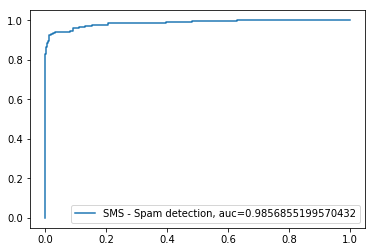

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred_proba = spam_classification_model.predict_proba(X_test_dtm)[:,1] #probability of predicting spam

# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="SMS - Spam detection, auc="+str(auc))
plt.legend(loc=4)

In [59]:
spamCollection.head(2)

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [60]:
X_ham = spamCollection.message[spamCollection.response=="ham"]
X_spam = spamCollection.message[spamCollection.response=="spam"]

In [61]:
words_ham = ' '.join(X_ham)

In [62]:
# words_ham
type(words_ham)

str

In [63]:
#!pip install wordcloud

In [64]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     min_font_size = 10).generate(words_ham) 

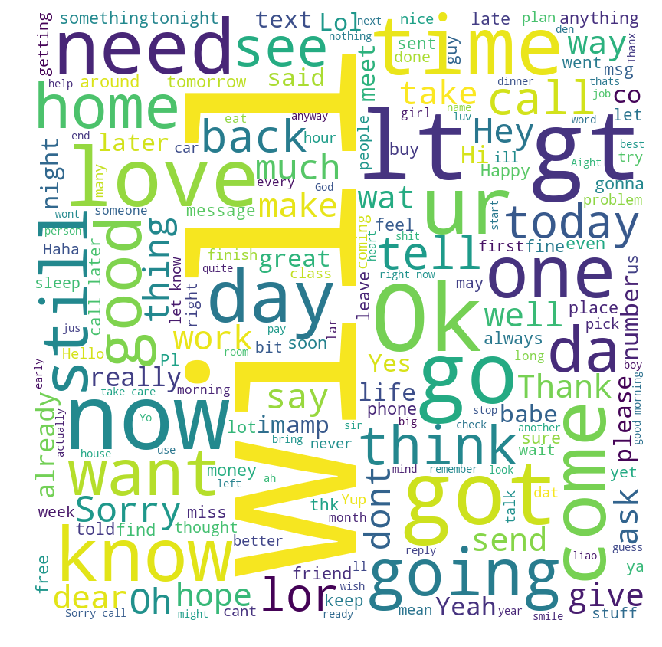

In [65]:
# plot the WordCloud image                        
plt.figure(figsize = (9, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
# Compare models
# Logistic regression, despite its name is a linear model for classification 
# rather than regression. Also known as "logit regression", Maximum-entropy
# classification (MaxEnt) or log-linear classifier.
# 
logreg = LogisticRegression()

In [67]:
# train the model
X_train= msg_tfidf
%time logreg.fit(X_train, y_train)

# slower than NB

Wall time: 62.5 ms


C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# Predict using X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [69]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [70]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9562096195262024

In [71]:
# Calculate the predicted probabilities for X-test_dtm
print(logreg.predict_proba(X_test_dtm))

y_pred_proba = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

[[0.94530706 0.05469294]
 [0.94228176 0.05771824]
 [0.92995327 0.07004673]
 ...
 [0.88964444 0.11035556]
 [0.49158422 0.50841578]
 [0.9660337  0.0339663 ]]


array([0.05469294, 0.05771824, 0.07004673, ..., 0.11035556, 0.50841578,
       0.0339663 ])

In [72]:
# array([[9.97122551e-01, 2.87744864e-03],
#        [9.99981651e-01, 1.83488846e-05],
#        [9.97926987e-01, 2.07301295e-03],
#        ...,
#        [9.99998910e-01, 1.09026171e-06],
#        [1.86697467e-10, 1.00000000e+00],
#        [9.99999996e-01, 3.98279868e-09]])

In [73]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9889878288884912

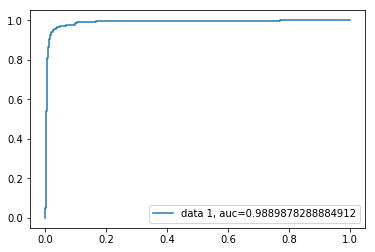

In [74]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test_dtm)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [75]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  56,  129]], dtype=int64)

---

In [76]:
#Benefit of Naive Bayes algo 

In [77]:
spam_classification_model = MultinomialNB().fit(X_train,y_train)

In [78]:
spam_classification_model.class_count_ #how many ham and spam respectively

array([3617.,  562.])

In [79]:
spam_classification_model.classes_#gives the class counts for ham and spam

array([0, 1], dtype=int64)

In [80]:
# naive bayes counts the number of time each token appears in each class
# why ?
# ans : conditional probaility
spam_classification_model.feature_count_

array([[0.        , 0.        , 0.        , ..., 0.        , 3.84690747,
        0.78717219],
       [0.66137419, 0.58141326, 0.35872998, ..., 0.30279525, 0.        ,
        0.        ]])

In [81]:
X_train_tokens = bag_of_words_tfrmr.get_feature_names()

In [82]:
# capture the ham & spam rows from the array
ham_token_count  = spam_classification_model.feature_count_[0, :]
spam_token_count = spam_classification_model.feature_count_[1, :]

In [83]:
# create a dataframe
tokens = pd.DataFrame({'tokens': X_train_tokens, 'ham': ham_token_count, 'spam': spam_token_count})

In [84]:
tokens.head()

,tokens,ham,spam
0,0,0.0,0.661374
1,008704050406,0.0,0.581413
2,0121,0.0,0.358730
3,01223585236,0.0,0.362251
4,01223585334,0.0,0.469024


In [85]:
# display 10 random tokens
tokens.sample(10, random_state=6)
#so very has a freq of 64 in ham and 2 freq in spam

,tokens,ham,spam
3882,katexxx,0.358935,0.000000
6633,tallent,0.707107,0.000000
706,88088,0.000000,0.478136
3733,itlet,0.601083,0.000000
3506,httpwwwwtlpcouktext,0.000000,0.412597
2439,dreamz,0.387332,0.000000
763,abelu,0.260890,0.000000
1707,champlaxigating,0.237944,0.000000
1086,assessment,0.376807,0.000000
4230,loxahatchee,0.791331,0.000000


In [86]:
# convert the ham and spam counts into relative frequencies
tokens['ham']  = tokens.ham/  spam_classification_model.class_count_[0]
tokens['spam'] = tokens.spam/ spam_classification_model.class_count_[1]
tokens.sample(5, random_state=6)

,tokens,ham,spam
3882,katexxx,0.000099,0.000000
6633,tallent,0.000195,0.000000
706,88088,0.000000,0.000851
3733,itlet,0.000166,0.000000
3506,httpwwwwtlpcouktext,0.000000,0.000734


In [87]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam/tokens.ham
tokens.sample(5, random_state=6)
#spam ratio helps in understanding how many times is the word spammy as compared to hammy

,tokens,ham,spam,spam_ratio
3882,katexxx,0.000099,0.000000,0.0
6633,tallent,0.000195,0.000000,0.0
706,88088,0.000000,0.000851,inf
3733,itlet,0.000166,0.000000,0.0
3506,httpwwwwtlpcouktext,0.000000,0.000734,inf


In [88]:
# examine the dataframe sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

,tokens,ham,spam,spam_ratio
0,0,0.000000,0.001177,inf
3506,httpwwwwtlpcouktext,0.000000,0.000734,inf
3500,httptms,0.000000,0.001674,inf
3501,httpwap,0.000000,0.000602,inf
3502,httpwwwbubbletextcom,0.000000,0.000767,inf
3503,httpwwwetlpcoukexpressoffer,0.000000,0.001139,inf
3504,httpwwwetlpcoukreward,0.000000,0.000734,inf
3505,httpwwwurawinnercom,0.000000,0.002642,inf
3508,hubby,0.000000,0.000493,inf
3573,ig11,0.000000,0.000619,inf


In [89]:
# look up for a specfic token: she
tokens.loc[tokens['tokens'] == 'honesty']

,tokens,ham,spam,spam_ratio
3444,honesty,0.000115,0.0,0.0
